### Importing the libraries

In [531]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

### Importing Dataset

In [532]:
Dataset = pd.read_csv('IRIS.csv')

### Performing EDA

In [533]:
Dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [534]:
Dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [535]:
Dataset.shape

(150, 5)

In [536]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [537]:
Dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [538]:
Dataset['species'].value_counts(normalize=True)

species
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64

In [539]:
Dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [540]:
Dataset.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Checking Outliers

<Axes: ylabel='sepal_length'>

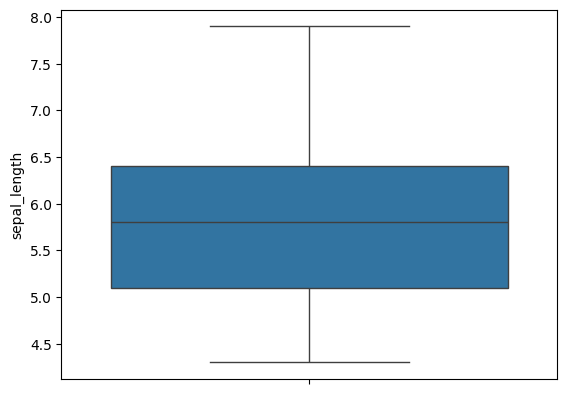

In [541]:
sns.boxplot(Dataset.sepal_length)

<Axes: ylabel='sepal_width'>

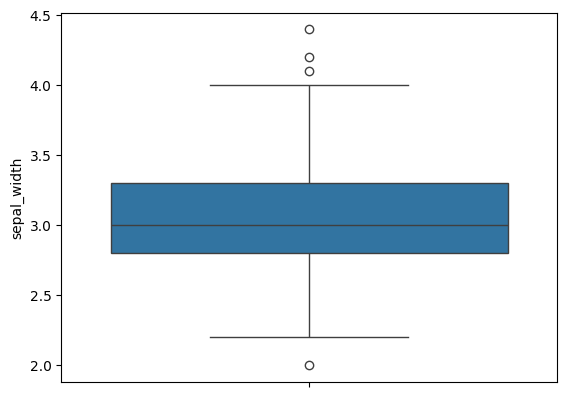

In [542]:
sns.boxplot(Dataset.sepal_width)

<Axes: ylabel='petal_length'>

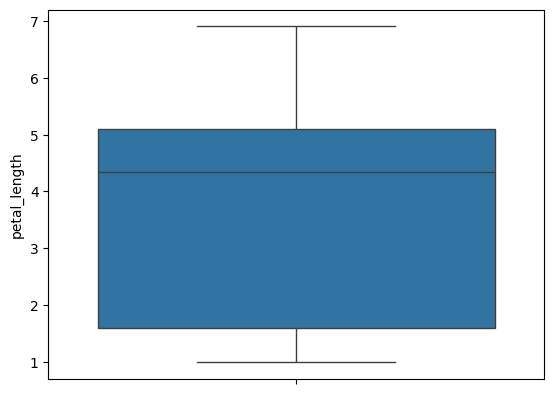

In [543]:
sns.boxplot(Dataset.petal_length)

<Axes: ylabel='petal_width'>

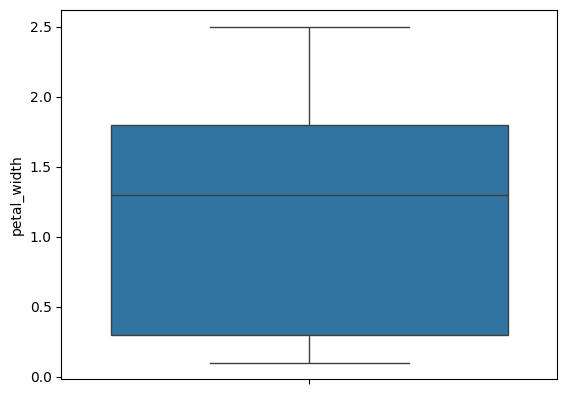

In [544]:
sns.boxplot(Dataset.petal_width)

### Distribution of input features

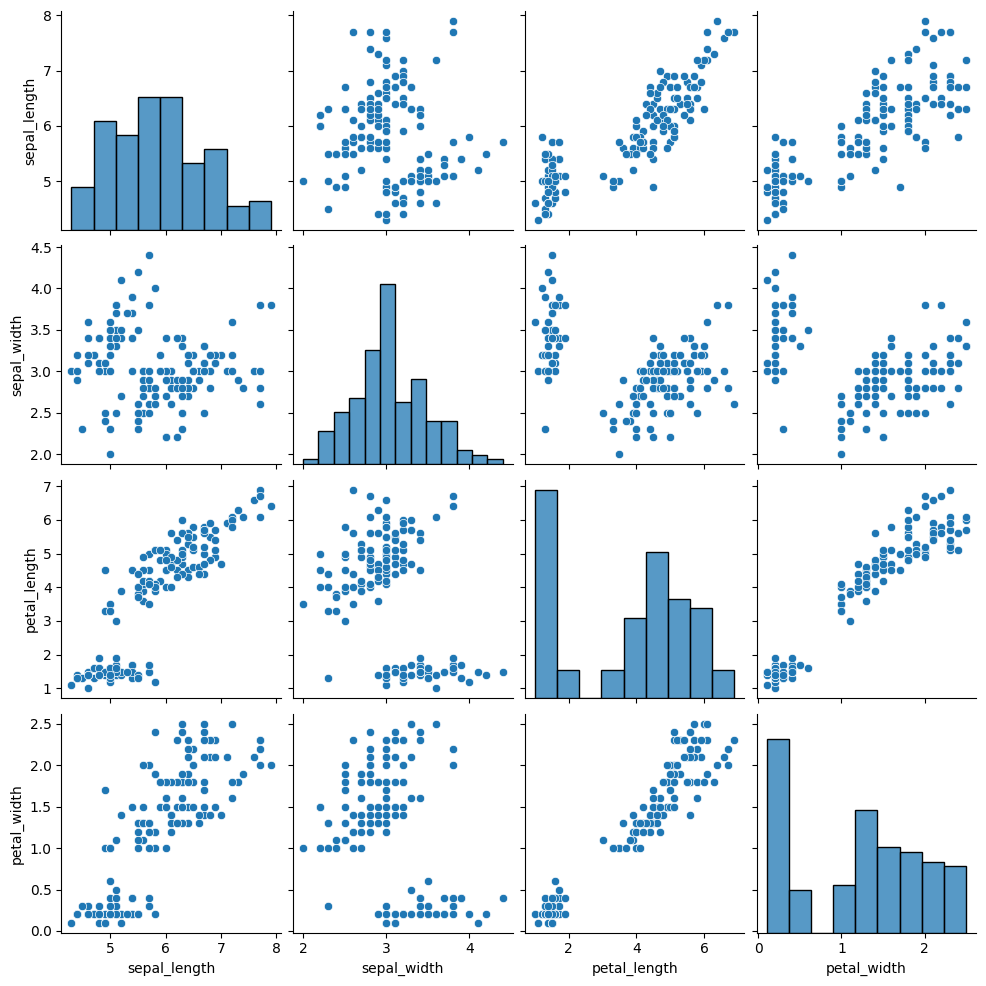

In [545]:
sns.pairplot(Dataset)

### Checking correlation between the input features

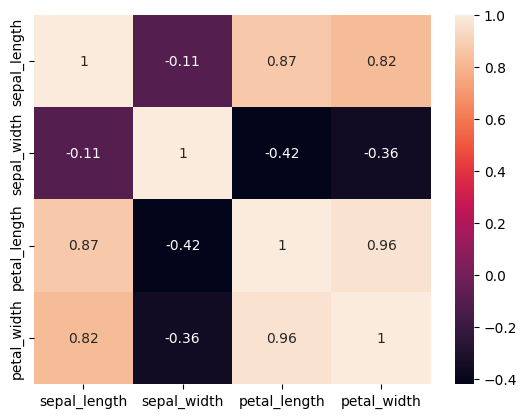

In [546]:
corr = Dataset[['sepal_length','sepal_width','petal_length','petal_width']].corr()
sns.heatmap(corr, annot=True)
plt.show()

### Input feature are highly Correlated

### Processing the Data by selecting feature and target variable

In [547]:
Feature = Dataset.drop("species",axis=1)
Target = Dataset.species

In [548]:
Feature.shape

(150, 4)

In [549]:
Target.shape

(150,)

### Scaling the features

In [550]:
sc = StandardScaler()
Feature = sc.fit_transform(Feature)

### Train and Test split

In [551]:
x_train,x_test,y_train,y_test = train_test_split(Feature,Target,train_size=0.75,test_size=0.25,random_state=100)

### DECISION TREE CLASSIFIER

In [552]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
DT_Pred = DT.predict(x_test)
DT_Acc = accuracy_score(DT_Pred,y_test)
print("Accuracy Score = ",round(DT_Acc*100,2),"%")

Accuracy Score =  94.74 %


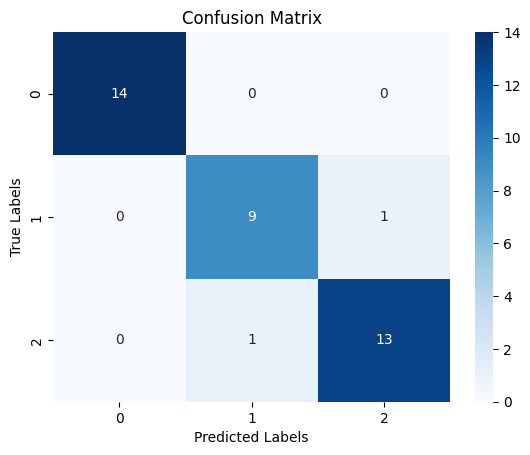

In [553]:
sns.heatmap(confusion_matrix(y_test,DT_Pred), annot=True,fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [554]:
DT.predict([[6.1,3.2,2.2,1.2]])

array(['Iris-virginica'], dtype=object)

### K-NEAREST NEIGHBOR CLASSIFIER

In [555]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)
KNN_Pred = KNN.predict(x_test)
KNN_Acc = accuracy_score(KNN_Pred,y_test)
print("Accuracy Score = ",round(KNN_Acc*100,2),"%")

Accuracy Score =  97.37 %


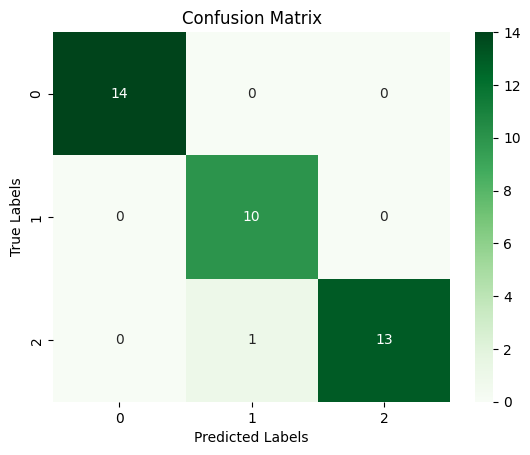

In [556]:
sns.heatmap(confusion_matrix(y_test,KNN_Pred), annot=True,fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [557]:
KNN.predict([[6.1,3.2,2.2,1.2]])

array(['Iris-virginica'], dtype=object)

### RANDOM FOREST CLASSIFIER

In [558]:
RF = RandomForestClassifier(n_estimators=100)
RF.fit(x_train,y_train)
RF_Pred = RF.predict(x_test)
RF_Acc = accuracy_score(RF_Pred,y_test)
print("Accuracy Score = ",round(RF_Acc*100,2),"%")

Accuracy Score =  94.74 %


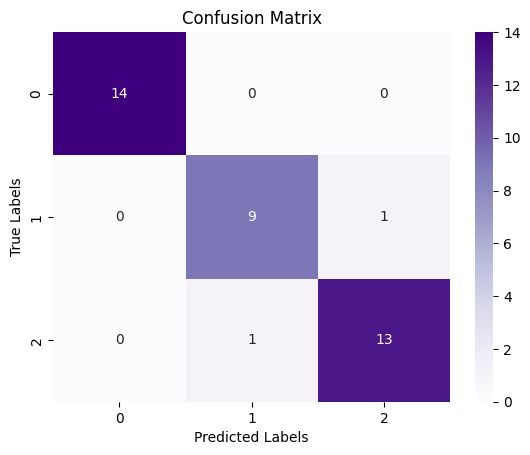

In [559]:
sns.heatmap(confusion_matrix(y_test,RF_Pred), annot=True,fmt='d', cmap='Purples')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [560]:
RF.predict([[6.1,3.2,2.2,1.2]])

array(['Iris-virginica'], dtype=object)

### LOGISTIC REGRESSION CLASSIFIER

In [561]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
LR_Pred = LR.predict(x_test)
LR_Acc = accuracy_score(LR_Pred,y_test)
print("Accuracy Score = ",round(LR_Acc*100,2),"%")

Accuracy Score =  94.74 %


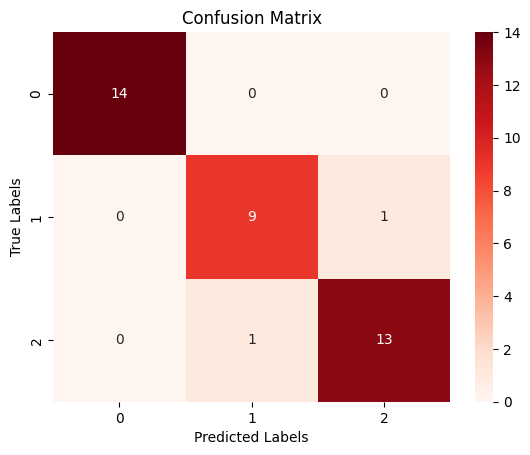

In [562]:
sns.heatmap(confusion_matrix(y_test,LR_Pred), annot=True,fmt='d', cmap='Reds')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [563]:
LR.predict([[6.1,3.2,2.2,1.2]])

array(['Iris-virginica'], dtype=object)

### All the models are performing well with the accuracy above 90 percent but the best one of all is K-Nearest Neighbor with the accuracy of 97.37 percent